# Cogsci 131 - Assignment 6
Selena Zhang

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd

## Question 1

In [55]:
##creating a region
region_sets = []
for i in range(10000):
    individual_set = []
    #2 random endpoints
    for i in range(2):
        individual_set.append(np.random.uniform(-10, 10.0001))
    #check if flipping list is needed
    if individual_set[0] > individual_set[1]:
        individual_set = individual_set[::-1]
    #append to total list
    region_sets.append(individual_set)

In [56]:
#contains function takes in a list region and a point
#returns true if point is in region
def contains(region, point):
    start = region[0]
    end = region[1]
    if point <= end and point >= start:
        return True
    else:
        return False


## Question 2

In [58]:
##if it contains 0
has_zero = []
for i in region_sets:
    if contains(i, 0) == True:
        has_zero.append(i)
    else:
        pass
##how many contain 0?
print("How many regions have zero: " + str(len(has_zero)))
##chance of picking 0 from each range
##function: a = given number, b = x value that changes, region = region you would like to check
def prob_output(a, b, region):
    array_a = [] 
    for i in region:
        if contains(i, a) == True:
            array_a.append(1/(i[1]-i[0]))
        else:
            pass
    array_b = []
    for j in region:
        if contains(j, b) == True:
            array_b.append(1/(j[1]-j[0]))
        else:
            pass
    #denominator: sum of all the probabilities over total regions
    denom = sum(array_a)/len(region)
    #numerator: sum of all probabilities for the number we want over the toal regions
    num = sum(array_b)/len(region)
    final = num/denom
    return final
#a = 0, b = 1 (know there's zero, want 1)
prob_output(0, 1, has_zero)

How many regions have zero: 5009


0.7824899773479301

$$\mathbb{P}(X = 1 | X = 0) = 0.7824899$$

## Question 3

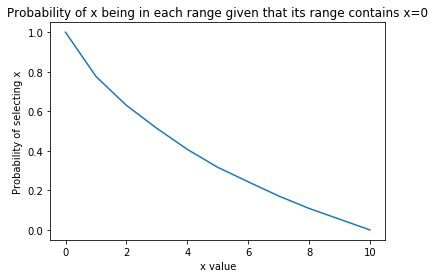

In [36]:

#range of numbers to pick
all_prob = []
x = np.arange(0, 11)
#iterating over each number, adding that to array
for j in x: 
    all_prob.append(prob_output(0, j, has_zero))

plt.plot(x, all_prob)
plt.title("Probability of x being in each range given that its range contains x=0")
plt.xlabel("x value")
plt.ylabel("Probability of selecting x")
plt.show()

This function looks like an exponential graph that decreases as the x value increases. Because we are choosing from regions that for sure have 0 in it, the chance of getting zero is exactly 1. Because the ranges are generated randomly, the further we are from zero, the less likely the point would be included in each consequential range that we know has zero in it. Thus, the number decreases exponentially. 

## Question 4

A logarithmic scale is one that increases by a factor of 10 at every interval and instead uses the exponent to construct the intervals. Thus, it is the inverse of an exponential, and thus converts an exponential curve into a straight line. For instance, 10^x would go from 10^1 to 10^2=100 to 10^3=1000, which would show come curvature, but a log scale would plot 1, 2, and 3 instead, which is a linear line. Thus, a log and an exponential "cancel" each other out, leaving a straight line, and checking if there's a straight line with a log scale would give evidence that there's an exponential.

## Question 5

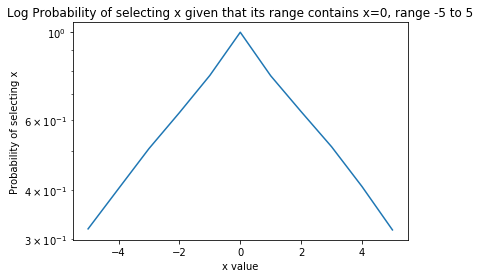

In [37]:

#range of numbers to pick: -5 to 5
all_prob_range1 = []
range1 = np.arange(-5, 6)
#iterate over each number
for x in range1:
    all_prob_range1.append(prob_output(0, x, has_zero))
plt.plot(range1, all_prob_range1)
plt.yscale("log")
plt.title("Log Probability of selecting x given that its range contains x=0, range -5 to 5")
plt.xlabel("x value")
plt.ylabel("Probability of selecting x")
plt.show()

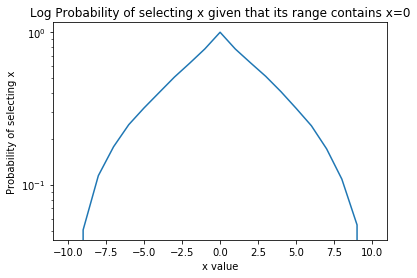

In [29]:
#range of numbers to pick: -10 to 10
all_prob_range2 = []
range2 = np.arange(-10, 11)
#iterate over each x value
for x in range2:
    all_prob_range2.append(prob_output(0, x, has_zero))
plt.plot(range2, all_prob_range2)
plt.yscale("log")
plt.title("Log Probability of selecting x given that its range contains x=0, range -10 to 10")
plt.xlabel("x value")
plt.ylabel("Probability of selecting x")
plt.show()

These two plots show the proability of choosing some x value given that the range contains x=0, and these are plotted on a log scale to determine exponential behavior and see smaller numbers. The first one is a sharp upside down-v shape and the second one is a much wider and curved upside down v- shape. In both of these graphs, we see that the probability is the highest when the x value is zero. This is because the consequential regions we have subsetted already have 0 in their range, so the chance that close values (i.e. 1, -1) will also be in the range is relatively high as well. The graph is symmetrical because the absolute distances from zero are the same for a negative and positive number of the same value (ex: -2 and 2 both are 2 away from 0), so they would have roughly the same probability as each other. The second graph is much more curved because we are including a larger range of x values, and they drop off exponentially the further we are from zero.

## Question 6

In [31]:
##converting previous code into functions to have cleaner code
#number of regions
def create_regions(regionnumber):
    region_sets = []
    for i in range(regionnumber):
        #individual region
        individual_set = []
        #2 random endpoints
        for i in range(2):
            individual_set.append(np.random.uniform(-10, 10.0001))
        #check if flipping list is needed
        if individual_set[0] > individual_set[1]:
            individual_set = individual_set[::-1]
        #append to total list
        region_sets.append(individual_set)
    return region_sets
#created regions with these sizes
region_set_10 = create_regions(10)
region_set_100 = create_regions(100)
region_set_1000 = create_regions(1000)
#has_zero as a function
def has_zero_fn(region):
    has_zero_array = []
    for i in region:
        if contains(i, 0) == True:
            has_zero_array.append(i)
        else:
            pass
    return has_zero_array


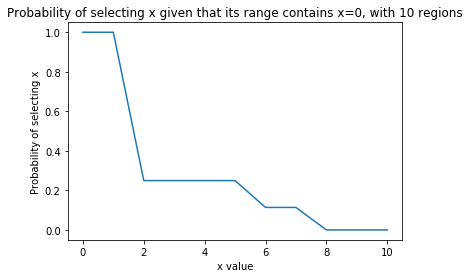

In [38]:
#10 regions

x_1 = np.arange(0, 11)
all_prob_10 = []
region_10 = has_zero_fn(region_set_10)
#iterate over
for x in x_1:
    all_prob_10.append(prob_output(0, x, region_10))

plt.plot(x_1, all_prob_10)
plt.title("Probability of x in region given that its range contains x=0, with 10 regions")
plt.xlabel("x value")
plt.ylabel("Probability of x")
plt.show()

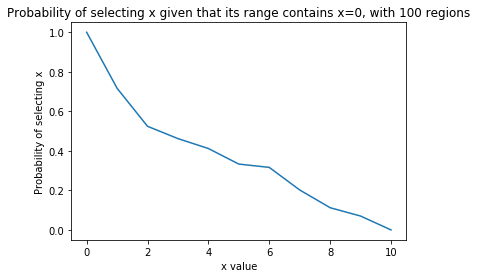

In [39]:
## 100 regions, including probability of drawing that number from each region

x_2 = np.arange(0, 11)
all_prob_100 = []
region_100 = has_zero_fn(region_set_100)
#iterate over
for x in x_2:
    all_prob_100.append(prob_output(0, x, region_100))
plt.plot(x_2, all_prob_100)
plt.title("Probability of x in region given that its range contains x=0, with 100 regions")
plt.xlabel("x value")
plt.ylabel("Probability of selecting x in region")
plt.show()

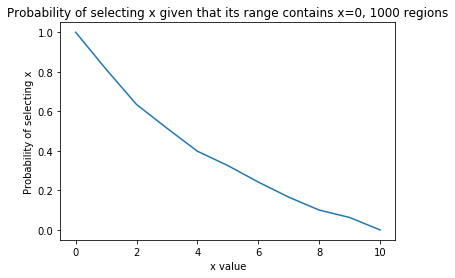

In [34]:
##1000 regions,  including probability of drawing that number from each region

x_3 = np.arange(0, 11)
all_prob_1000 = []
region_1000 = has_zero_fn(region_set_1000)
#iterate over each x value
for x in x_3:
    all_prob_1000.append(prob_output(0, x, region_1000))

plt.plot(x_3, all_prob_1000)
plt.title("Probability of x in region given that its range contains x=0, 1000 regions")
plt.xlabel("x value")
plt.ylabel("Probability of x in region")
plt.show()

I notice that for fewer consequential regions, the graph has a lot of sharp turns because there are not enough consequential regions that would have zero that we can work with. Thus, while we can get a general sense that the graph will decrease, it is not that precise. As we increase the number of consequential regions used, we see that the graph is much more smoother, looks similar to an exponential, and has fewer sudden changes.

## Question 7

One way to measure how many consequential regions there are would be to take the log of the probabilities and calculate the slope of the log graph. From question 4, we know that if the logarithmic graph is straight, then the regular curve is exponential. Upon looking at the graphs in question 6, we see that the more consequential regions we include, the more smooth the curve is. For instance, the graph with 10 regions has lots of sharp turns and edges, while the graph with 1000 regions has less sharp turns. My test would be to take the log of the probability graph and then calculate the slope of the log graph at various different points. If the slope is different at those various points, then it would have less consequential regions. Conversely, if the slope is closer to constant, then there would be more consequential regions. 

With this test, I would be able to tell the difference between 10 and 10000 consequential regions, because the change in slope for the log graph would be much higher for 10 consequential regions than 10,000 consequential regions. However, for 10,000 and 20,000 consequential regions, both have a pretty smooth exponential curve and would have closer to linear lines, and thus a constant slope. Thus, it would be harder to tell the exact number of consequential regions, other than the fact that there are a high number of consequential regions.